# 1 Понимание бизнеса
1.1 Цель -
Предсказать качество вина в зависимости от его химических характеристик



1.2 Описание

Дан набор данных  с красными и белыми вариантами португальского вина "Vinho Verde".  Доступны только физико-химические (входные) и сенсорные (выходные) переменные.

Необходимо на основе этих данных научиться предсказывать качество вина







# 2. Data understanding

2.1 Устанавливаем и загружаем необходимые библиотеки

In [25]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2.2 Загрузка данных и описание переменных

In [3]:
df = pd.read_csv('/content/winequalityN.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Описание переменных


1 - фиксированная кислотность

2 - летучая кислотность

3 - лимонная кислота

4 - остаточный сахар

5 - хлориды

6 - свободный диоксид серы

7 - общий диоксид серы

8 - плотность

9 - pH

10 - сульфаты

11 - алкоголь

12 - качество (оценка от 0 до 10)

2.3 Статистика и визуализация

In [4]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# 2.4 Статистика и визуализация

2.4.1 Ключевая информация о переменных

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Посчитаем количество значений quality в датасете

In [6]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Смотрим, есть ли строки, в которых отсутствуют данные

In [7]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

2.4.2 Построим тепловую карту корреляции для понимания важности переменных

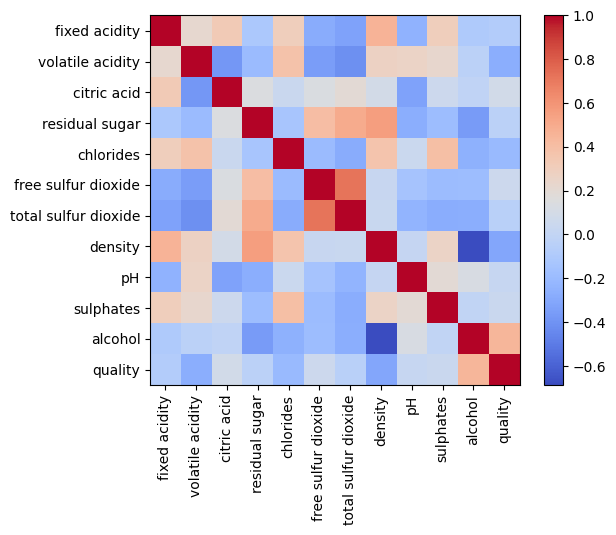

In [8]:
corr_matrix = df.loc[:,~df.columns.isin(['type'])].corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

2.4.3 Посмотрим на баланс классов

<Axes: >

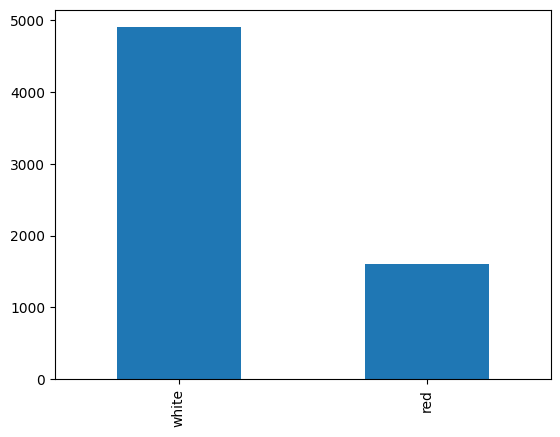

In [9]:
df['type'].value_counts().plot(kind='bar')

Классы сильно не сбалансированы

2.4.4 Построим график распределения качества вина в зависимости от его типа

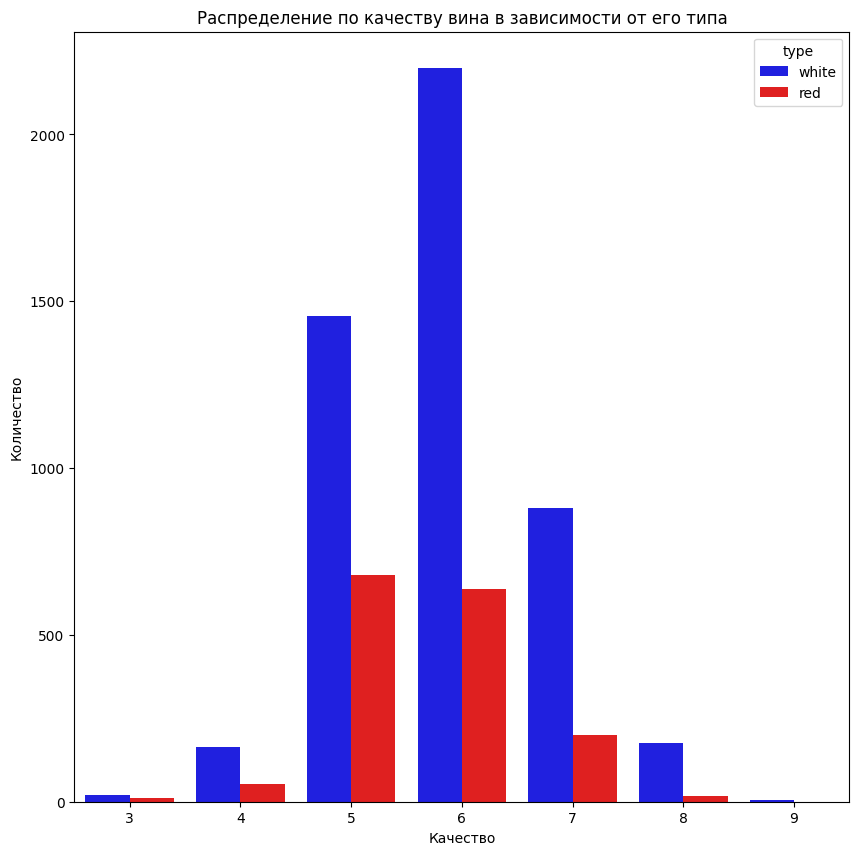

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(x='quality',hue='type', data=df, palette= ['blue','red'])
plt.xlabel('Качество')
plt.ylabel('Количество')
plt.title('Распределение по качеству вина в зависимости от его типа')
plt.show()

# 3. Data preparation

3.1 Переведем категориальную переменную type в дискретную с помощью LabelEncoder

In [11]:
label_encoder = LabelEncoder()
df['type_d'] = label_encoder.fit_transform(df['type'])
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_d
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,0
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [12]:
df_f = df.drop('type', axis=1)
df_f

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_d
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


3.2 Так как пропущенных значений немного, то можем их удалить

In [13]:
df_f = df_f.dropna()
df_f

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_d
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


3.3 Создание датасета

Разбиваем данные на тренировочные и тестовые выборки

In [14]:
X = df_f.loc[:,~df_f.columns.isin(['quality'])]

Проведем нормализацию данных с помощью StandartScaler

In [15]:
sc = StandardScaler()

In [16]:
sc.fit(X)
X_standard = sc.transform(X)

In [17]:
y = df_f['quality']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.2, random_state=42)

3.4 С помощью RandomForest определим наиболее важные признаки


In [19]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

<Axes: >

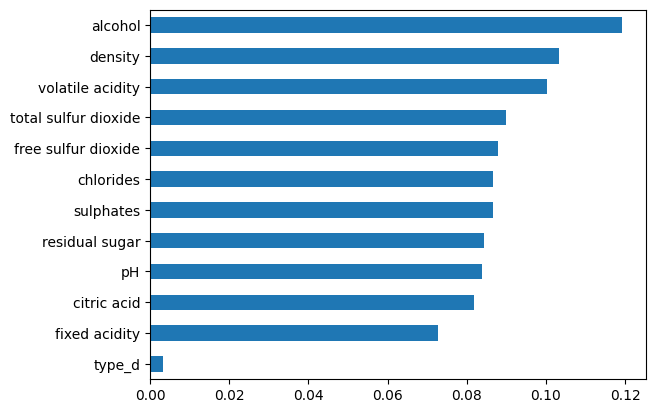

In [20]:
pd.Series(rfc.feature_importances_, index = df_f.drop('quality', axis = 1).columns).sort_values().plot(kind = 'barh')

# 4. Моделирование

4.1 Выбор модели

Используем RandomForest в качестве модели (тем более он был ранее задействован)

В качестве целевой метрики будем использовать f1-score, так как имеем явный дисбаланс классов

Добавим дополнительные параметры для более точного предсказания

In [21]:
rfc_1 = RandomForestClassifier(class_weight='balanced', max_depth=16, n_estimators=500, random_state=43)

4.2 Обучение модели

In [22]:
rfc_1.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=16, n_estimators=500,
                       random_state=43)

# 5. Оценка модели

In [23]:
pred_rfc = rfc_1.predict(X_test)

5.1 Посмотрим на метрики

In [24]:
print(classification_report(pred_rfc,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.06      0.60      0.11         5
           5       0.72      0.70      0.71       443
           6       0.74      0.63      0.68       635
           7       0.57      0.67      0.62       196
           8       0.29      0.92      0.44        13
           9       0.00      0.00      0.00         0

    accuracy                           0.66      1293
   macro avg       0.34      0.50      0.37      1293
weighted avg       0.70      0.66      0.68      1293



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Мы видим, что модель плохо распознала классы 3, 4, 8 и 9 ввиду сильного дисбаланса датасета

# 6. Развертывание модели

Сохраняем нашу модель

In [ ]:
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rfc_1, file)